In [126]:
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [127]:
df = pd.read_excel('./dataset/RSW-dataset.xlsx')

In [161]:
df.describe()

,NUGGET.WIDTH.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME,t_min,D_min,D_max,quality
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,4.491030,1.197425,0.012433,0.581705,41.015986,1.836590,1.340586,0.0,0.581705,41.015986,1.836590,880.117229,7.988348,359.560764,1.197425,5.457405,8.186107,0.435169
std,2.491282,0.162870,0.110859,0.493498,36.004120,0.986997,0.310749,0.0,0.493498,36.004120,0.986997,126.615472,1.708172,162.698768,0.162870,0.390491,0.585737,0.495999
min,0.000000,0.800000,0.000000,0.000000,0.000000,1.000000,0.800000,0.0,0.000000,0.000000,1.000000,499.000000,4.200000,166.700000,0.800000,4.472136,6.708204,0.000000
25%,3.600000,1.200000,0.000000,0.000000,0.000000,1.000000,1.200000,0.0,0.000000,0.000000,1.000000,899.000000,6.700000,250.050000,1.200000,5.477226,8.215838,0.000000
50%,5.100000,1.200000,0.000000,1.000000,60.000000,1.000000,1.200000,0.0,1.000000,60.000000,1.000000,910.000000,8.200000,300.060000,1.200000,5.477226,8.215838,0.000000
75%,6.300000,1.200000,0.000000,1.000000,70.000000,3.000000,1.400000,0.0,1.000000,70.000000,3.000000,910.000000,9.100000,400.000000,1.200000,5.477226,8.215838,1.000000
max,9.200000,1.500000,1.000000,1.000000,94.000000,3.000000,2.000000,0.0,1.000000,94.000000,3.000000,1124.000000,13.500000,800.000000,1.500000,6.123724,9.185587,1.000000


In [129]:
# Step 1: compute thinner sheet thickness
df['t_min'] = df[['THICKNESS.1', 'THICKNESS.2']].min(axis=1)


In [130]:
# Step 2: compute standard-based minimum acceptable nugget width
df['D_min'] = 5 * np.sqrt(df['t_min'])

In [131]:
df['D_max'] = 1.5 * df['D_min']

In [132]:
df['quality'] = np.where(
    (df['NUGGET.WIDTH.1'] >= df['D_min']) & (df['NUGGET.WIDTH.1'] <= df['D_max']),
    1,   # acceptable
    0    # unacceptable
)

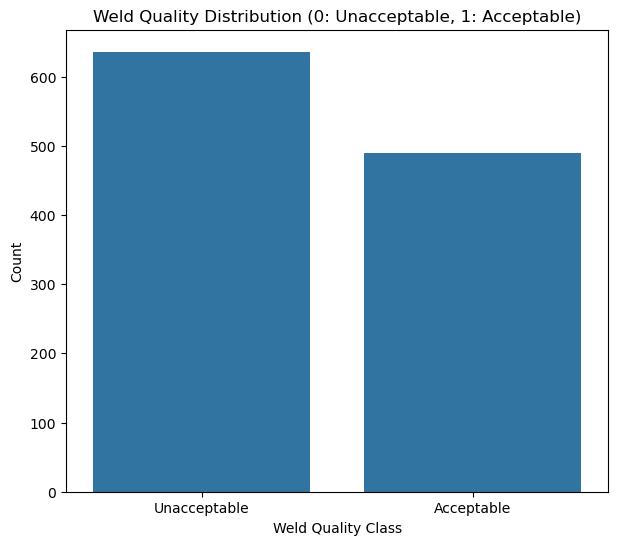

In [162]:
plt.figure(figsize=(7, 6))
sns.countplot(x='quality', data=df)
plt.title('Weld Quality Distribution (0: Unacceptable, 1: Acceptable)')
plt.xlabel('Weld Quality Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Unacceptable', 'Acceptable'])
plt.show()

In [134]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [135]:
print('train_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (900, 20)
test_df.shape: (226, 20)


In [136]:
df

,NUGGET.WIDTH.1,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME,t_min,D_min,D_max,quality
0,3.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0,0.8,4.472136,6.708204,0
1,4.4,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0,0.8,4.472136,6.708204,0
2,4.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0,0.8,4.472136,6.708204,1
3,4.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0,0.8,4.472136,6.708204,0
4,5.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0,0.8,4.472136,6.708204,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0,1.2,5.477226,8.215838,0
1122,4.8,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,700.0,1.2,5.477226,8.215838,0
1123,4.6,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0,1.2,5.477226,8.215838,0
1124,4.7,Material_D,1.2,0,1,94,1,Material_D,1.2,0,1,94,1,1011,9.4,750.0,1.2,5.477226,8.215838,0


In [137]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'quality'

In [138]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [139]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [140]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [141]:
train_inputs[numeric_cols].describe()

,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME,t_min,D_min,D_max
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1.197944,0.008889,0.567778,40.195556,1.864444,1.348167,0.0,0.567778,40.195556,1.864444,884.811111,7.960633,357.078822,1.197944,5.458900,8.188349
std,0.161210,0.093913,0.495660,36.312045,0.991321,0.315293,0.0,0.495660,36.312045,0.991321,123.369869,1.738287,161.560156,0.161210,0.386255,0.579382
min,0.800000,0.000000,0.000000,0.000000,1.000000,0.800000,0.0,0.000000,0.000000,1.000000,499.000000,4.200000,166.700000,0.800000,4.472136,6.708204
25%,1.200000,0.000000,0.000000,0.000000,1.000000,1.200000,0.0,0.000000,0.000000,1.000000,899.000000,6.700000,250.050000,1.200000,5.477226,8.215838
50%,1.200000,0.000000,1.000000,60.000000,1.000000,1.200000,0.0,1.000000,60.000000,1.000000,910.000000,8.100000,300.060000,1.200000,5.477226,8.215838
75%,1.200000,0.000000,1.000000,70.000000,3.000000,1.400000,0.0,1.000000,70.000000,3.000000,910.000000,9.100000,400.000000,1.200000,5.477226,8.215838
max,1.500000,1.000000,1.000000,94.000000,3.000000,2.000000,0.0,1.000000,94.000000,3.000000,1124.000000,13.500000,800.000000,1.500000,6.123724,9.185587


In [142]:
train_inputs[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [143]:
df[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [144]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [145]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [146]:
encoder.categories_

[array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object),
 array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object)]

In [147]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['MATERIAL.1_Material_A', 'MATERIAL.1_Material_B', 'MATERIAL.1_Material_C', 'MATERIAL.1_Material_D', 'MATERIAL.1_Material_E', 'MATERIAL.2_Material_A', 'MATERIAL.2_Material_B', 'MATERIAL.2_Material_C', 'MATERIAL.2_Material_D', 'MATERIAL.2_Material_E']


In [148]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [149]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (900, 28)
train_targets: (900,)
test_inputs: (226, 28)
test_targets: (226,)


In [150]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [151]:
def evalute(targets, predictions,  name=''):
    print(name)
    accuracy = accuracy_score(targets, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    
    kappa = cohen_kappa_score(targets, predictions)
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    
    roc = roc_auc_score(targets, predictions)
    print(f"roc_auc_score: {roc:.4f}")
    
    print("confusion matrix")
    sns.heatmap(confusion_matrix(targets, predictions), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# logistic regression

In [152]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

Training
Accuracy: 0.8400
Cohen's Kappa Score: 0.6744
roc_auc_score: 0.8396
confusion matrix


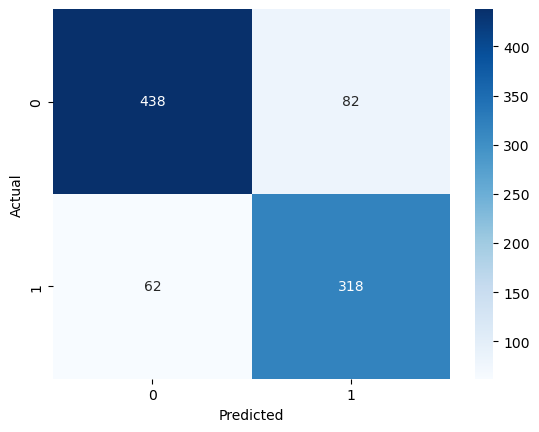

In [153]:
train_preds = log_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Testing
Accuracy: 0.8451
Cohen's Kappa Score: 0.6904
roc_auc_score: 0.8456
confusion matrix


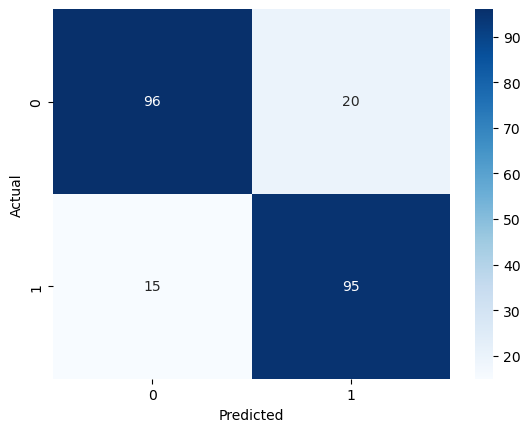

In [154]:
test_preds = log_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

# naive_bayes


In [155]:
nb_model = GaussianNB()
nb_model.fit(X_train, train_targets)

GaussianNB()

Training
Accuracy: 0.8100
Cohen's Kappa Score: 0.6207
roc_auc_score: 0.8186
confusion matrix


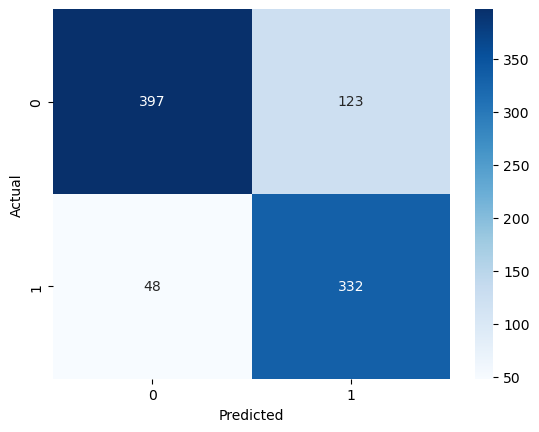

In [156]:
train_preds = nb_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Testing
Accuracy: 0.8363
Cohen's Kappa Score: 0.6738
roc_auc_score: 0.8384
confusion matrix


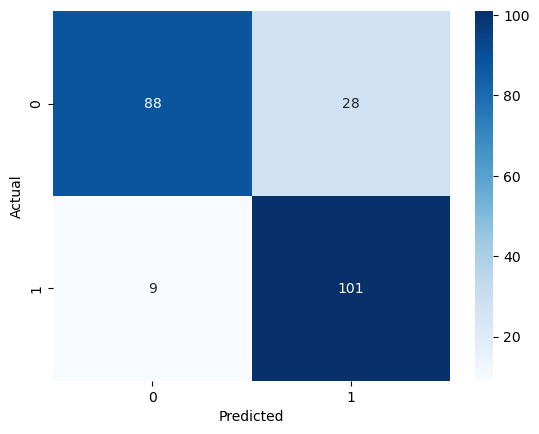

In [157]:
test_preds = nb_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

# Random Forest

In [158]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, train_targets)

RandomForestClassifier()

Training
Accuracy: 0.9333
Cohen's Kappa Score: 0.8629
roc_auc_score: 0.9299
confusion matrix


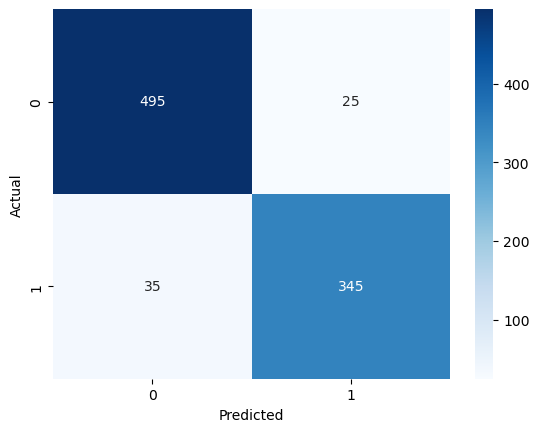

In [159]:
train_preds = rf_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Testing
Accuracy: 0.8230
Cohen's Kappa Score: 0.6456
roc_auc_score: 0.8226
confusion matrix


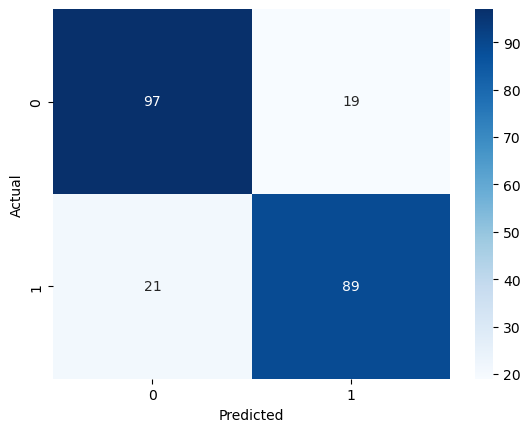

In [160]:
test_preds = rf_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")